In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
iris = datasets.load_iris()
X = iris.data  # Features
Y = iris.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [6]:
inertia = []
K = range(1, 11) 
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

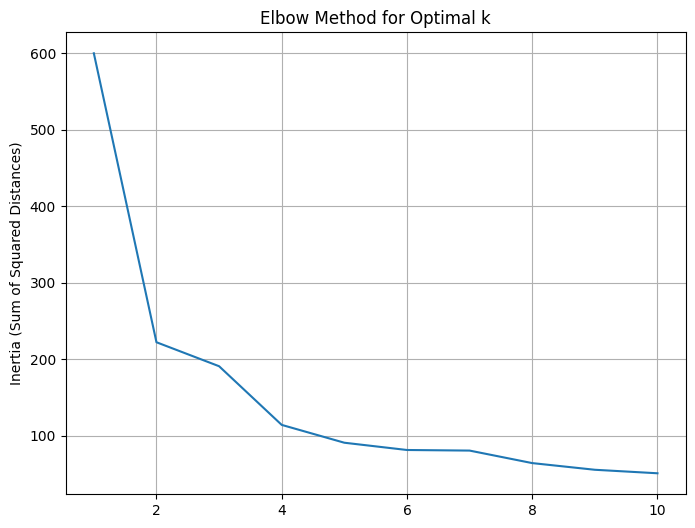

In [7]:
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia)
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 42)  # 3 clusters for 3 Iris species
kmeans.fit(x_scaled)

# Cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [9]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['True Label'] = Y
df['Cluster'] = labels
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),True Label,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


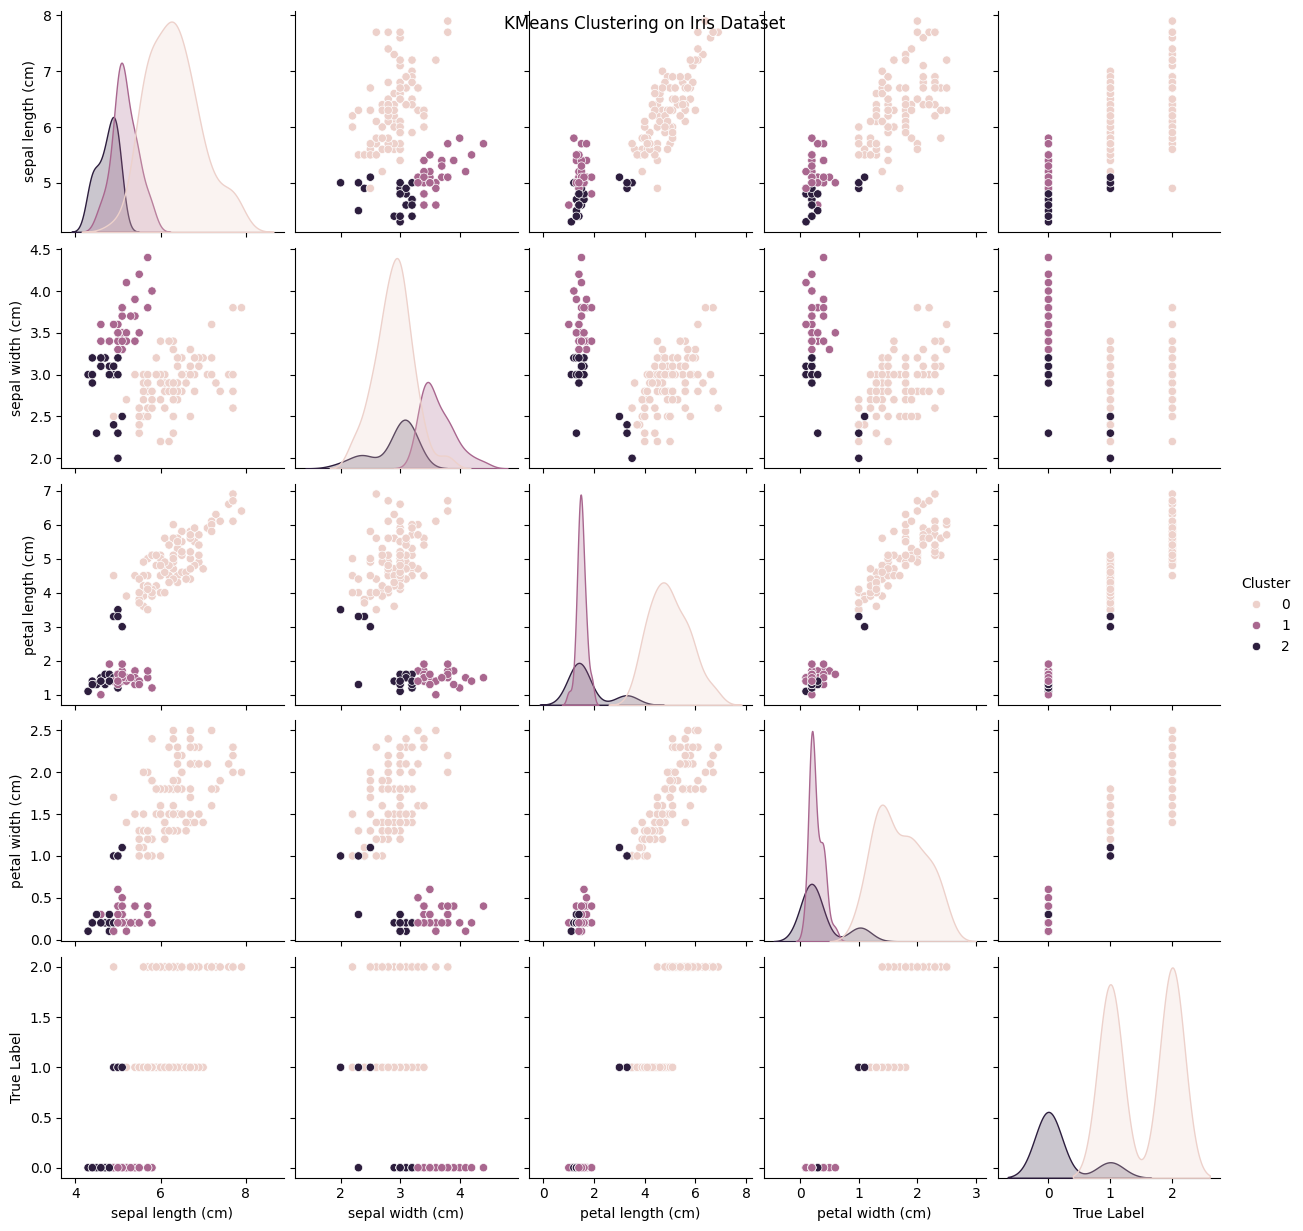

In [12]:
# Visualize the clustering results using seaborn pairplot
sns.pairplot(df, hue='Cluster')
plt.suptitle("KMeans Clustering on Iris Dataset")
plt.show()